In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

In [2]:
K = np.array([[400, 0, 400],
             [0, 400, 300],
             [0,   0,   1]])

In [3]:
right = [ np.array([1.5, 0, 0]), np.array([0.5, 1, 0]), np.array([1, 1, 0]), np.array([0.2, 1.8, 0]), 
         np.array([0.5, 1.8, 0]), np.array([0, 2.7, 0])]
right.reverse()
left = right[:]
left = [np.array([-x, y, z]) for x,y,z in left]
left.reverse()
spruce = right + left

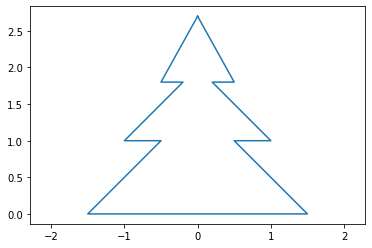

In [4]:
X, Y, _ = zip(*spruce)
plt.plot(X,Y)
plt.axis('equal')
plt.show()

In [5]:
spruce = -np.array(spruce)
spruce

array([[-0. , -2.7, -0. ],
       [-0.5, -1.8, -0. ],
       [-0.2, -1.8, -0. ],
       [-1. , -1. , -0. ],
       [-0.5, -1. , -0. ],
       [-1.5, -0. , -0. ],
       [ 1.5, -0. , -0. ],
       [ 0.5, -1. , -0. ],
       [ 1. , -1. , -0. ],
       [ 0.2, -1.8, -0. ],
       [ 0.5, -1.8, -0. ],
       [ 0. , -2.7, -0. ]])

In [6]:
def get_color(z):
    b = (200 * np.exp(-10/z)).astype('uint8')
    r = int(b * 0.8)
    return (r, 200, b)

In [7]:
def generate_trees(N, cam_height=2):
    gamma = np.random.normal(0,0.6, size=N)
    dist = np.random.uniform(5, 200, size=N)
    trees = []
    for g,d in zip(gamma, dist):
        trees.append( spruce + d * np.array([np.sin(g), cam_height/d, np.cos(g)]) )
    
#     return trees
    return sorted(trees, key=lambda poly: 1/poly[0][2])

In [8]:
def create_image(trees):
    im = Image.new("RGB", (800, 600), (255,255,255))
    draw = ImageDraw.Draw(im)
    for tree in trees:
        z = tree[0][2]
        tree_px = [ tuple((K.dot(v) / z)[:2]) for v in tree]
        color = get_color(z)
        draw.polygon(tree_px, fill=color, outline=None)

    return im
    

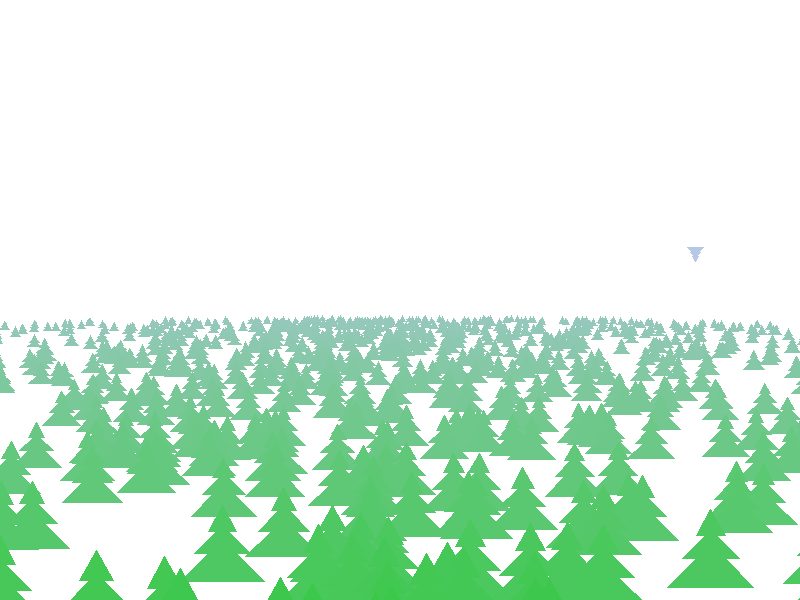

In [10]:
trees = generate_trees(1000, cam_height=10)
im = create_image(trees)
im